In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, roc_curve, auc



In [6]:
sec_mushroom = pd.read_csv(r"C:\Users\0\Documents\MushroomDataset\secondary_data.csv", sep=";")


In [7]:
sec_mushroom.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [8]:
sec_mushroom.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [5]:
#checking for null values
sec_mushroom.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [9]:
# Replace values in the columns with their corresponding values from the dictionaries

cap_shape={"b": "bell", "c": "conical", "x": "convex", "f": "flat", "p": "spherical", "s": "sunken", "o": "others"}
sec_mushroom["cap-shape"]=sec_mushroom["cap-shape"].replace(cap_shape)

cap_surface={"i": "fibrous", "g": "grooves", "y": "scaly", "s": "smooth","h": "shiny", "l": "leathery", "k": "silky", "t": "sticky"}
sec_mushroom["cap-surface"]=sec_mushroom["cap-surface"].replace(cap_surface)

cap_color={"n": "brown", "b": "buff", "g": "gray", "r": "green", "p": "pink", "u": "purple", "e": "red", "w": "white", "y": "yellow", "l": "blue", "f": "none", "o": "orange","k":"black"}
sec_mushroom["cap-color"]=sec_mushroom["cap-color"].replace(cap_color)

bruises={"t":"bruises","f":"no"}
sec_mushroom["does-bruise-or-bleed"]=sec_mushroom["does-bruise-or-bleed"].replace(bruises)

gill_attachment={"a": "adnate", "x": "adnexed", "d": "decurrent", "e": "free", "s": "sinuate", "p": "pores", "f": "none", "?": "unknown"}
sec_mushroom["gill-attachment"]=sec_mushroom["gill-attachment"].replace(gill_attachment)

gill_spacing={"c": "close", "d":"distant", "f": "none"}
sec_mushroom["gill-spacing"]=sec_mushroom["gill-spacing"].replace(gill_spacing)

sec_mushroom["gill-color"]=sec_mushroom["gill-color"].replace(cap_color)

sec_mushroom["stem-color"]=sec_mushroom["stem-color"].replace(cap_color)

veil_type={"p": "partial", "u": "universal"} 
sec_mushroom["veil-type"]=sec_mushroom["veil-type"].replace(veil_type)

sec_mushroom["veil-color"]=sec_mushroom["veil-color"].replace(cap_color)

ring_type={"c": "cobwebby", "e": "evanescent", "f": "flaring", "g": "grooved", "l": "large", "p": "pendant", "s": "sheathing", "z": "zone", "y": "scaly", "m": "movable", "f": "none", "?": "unknown"}
sec_mushroom["ring-type"]=sec_mushroom["ring-type"].replace(ring_type)

sec_mushroom["spore-print-color"]=sec_mushroom["spore-print-color"].replace(cap_color)

habitat={"g": "grasses", "l": "leaves", "m": "meadows", "p": "paths", "h": "heaths", "u": "urban", "w": "waste", "d": "woods"}
sec_mushroom["habitat"]=sec_mushroom["habitat"].replace(habitat)

season={"s": "spring", "u": "summer", "a": "autumn", "w": "winter"}
sec_mushroom["season"]=sec_mushroom["season"].replace(season)

classs={"e":"edible","p":"poisonous"}
sec_mushroom["class"]=sec_mushroom["class"].replace(classs)

In [7]:
sec_mushroom.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,poisonous,15.26,convex,grooves,orange,no,free,NaN,white,16.95,...,s,y,white,universal,white,t,grooved,NaN,woods,winter
1,poisonous,16.60,convex,grooves,orange,no,free,NaN,white,17.99,...,s,y,white,universal,white,t,grooved,NaN,woods,summer
2,poisonous,14.07,convex,grooves,orange,no,free,NaN,white,17.80,...,s,y,white,universal,white,t,grooved,NaN,woods,winter
3,poisonous,14.17,flat,shiny,red,no,free,NaN,white,15.77,...,s,y,white,universal,white,t,pendant,NaN,woods,winter
4,poisonous,14.64,convex,shiny,orange,no,free,NaN,white,16.53,...,s,y,white,universal,white,t,pendant,NaN,woods,winter


In [10]:
#fill missing value
sec_mushroom["cap-surface"] = sec_mushroom["cap-surface"].fillna("unknown")
sec_mushroom["gill-attachment"] = sec_mushroom["gill-attachment"].fillna("unknown")
sec_mushroom["ring-type"] = sec_mushroom["ring-type"].fillna("unknown")

In [9]:
sec_mushroom.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface                 0
cap-color                   0
does-bruise-or-bleed        0
gill-attachment             0
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                   0
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [12]:
#remove columns with majority missing data
sec_mushroom = sec_mushroom.drop(['stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color'], axis=1)

Data Visualisation

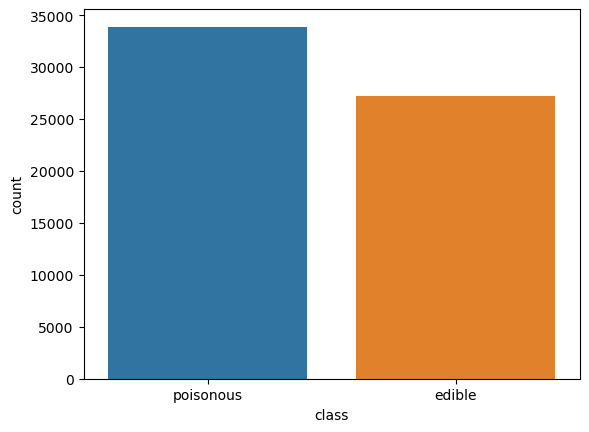

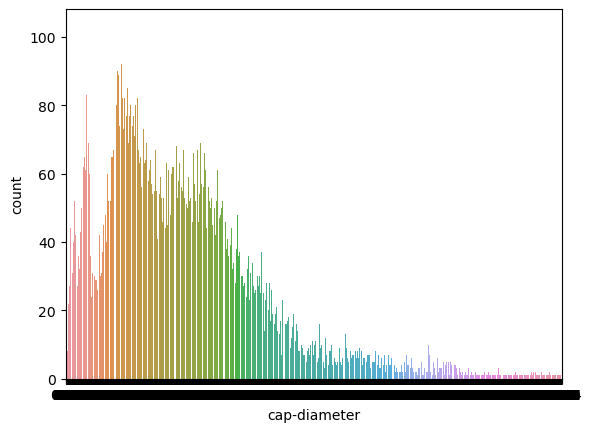

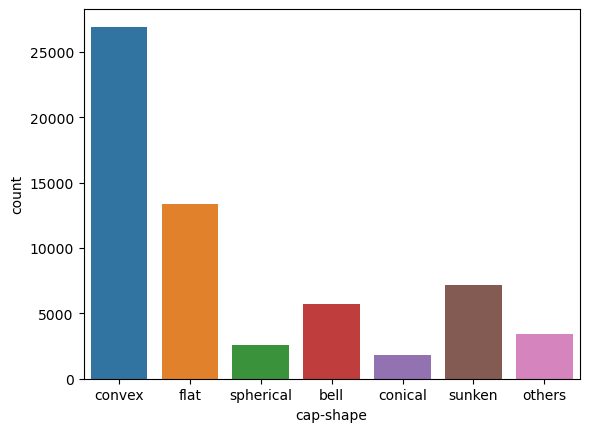

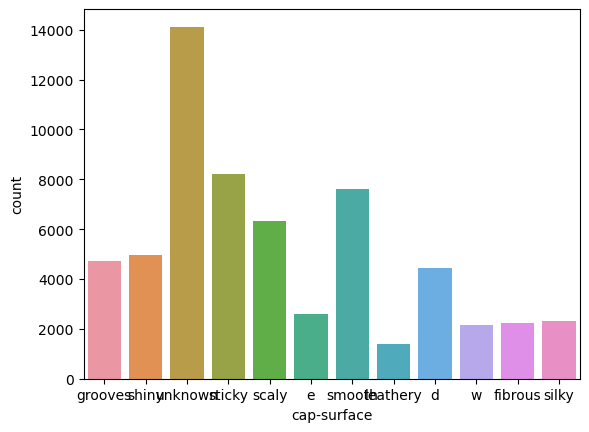

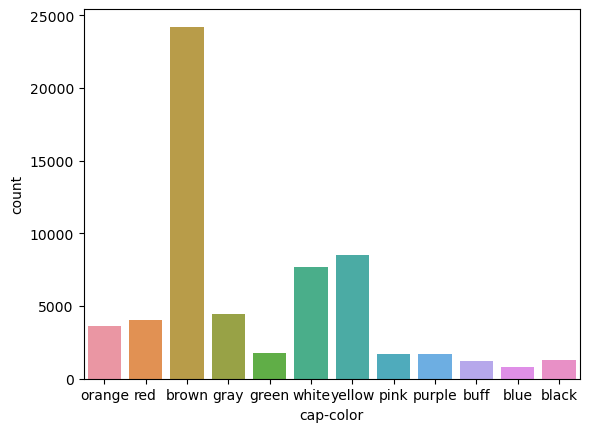

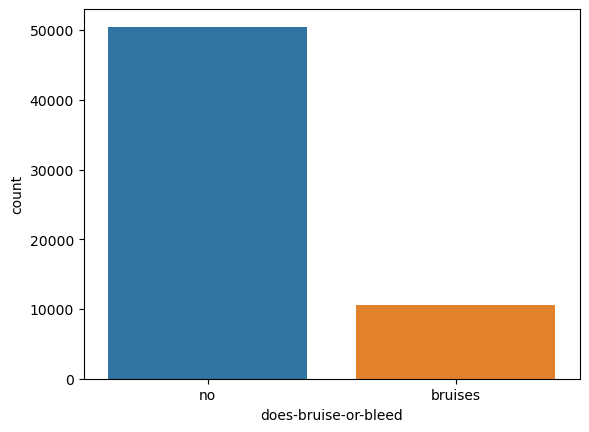

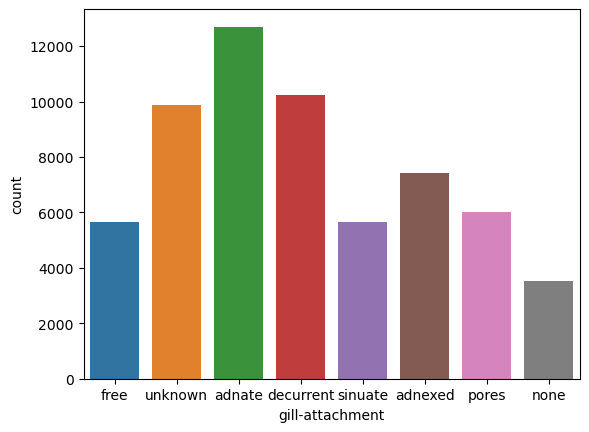

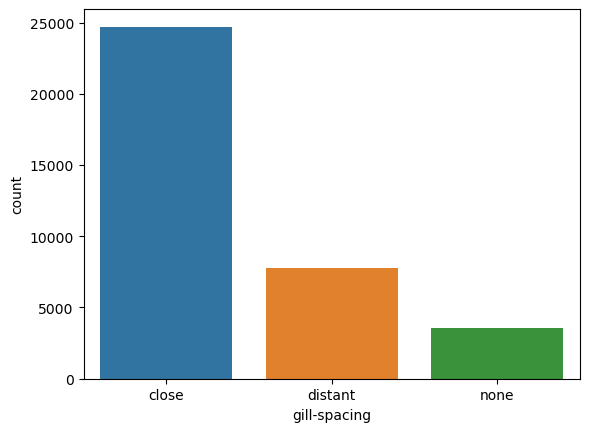

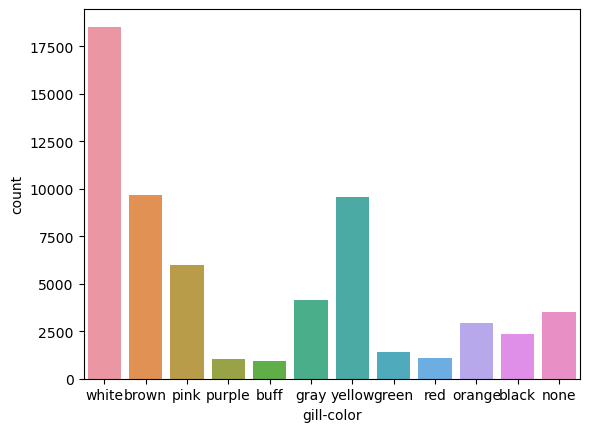

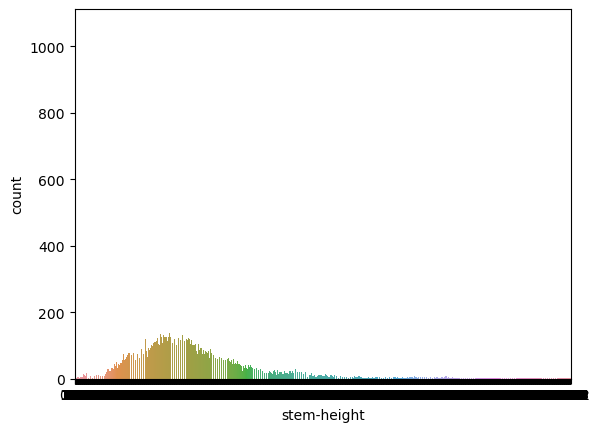

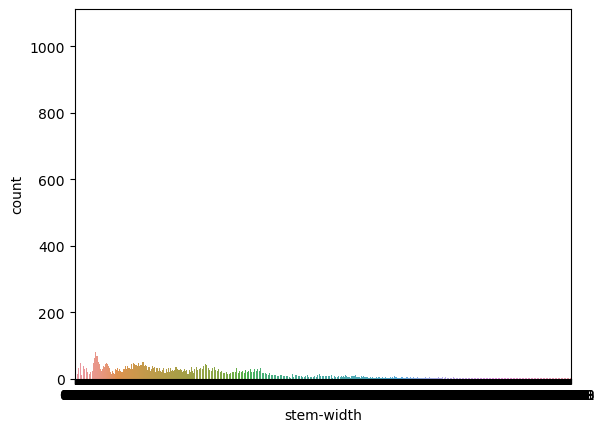

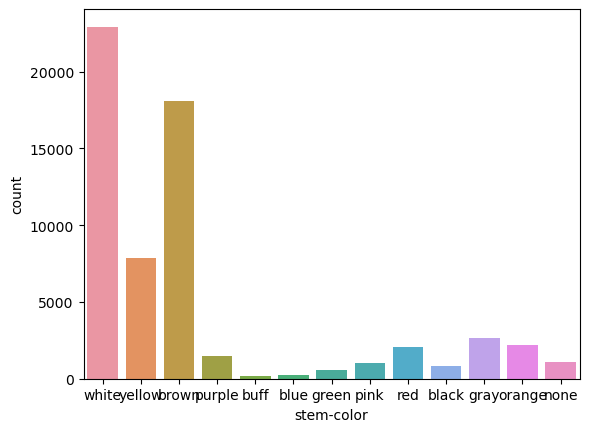

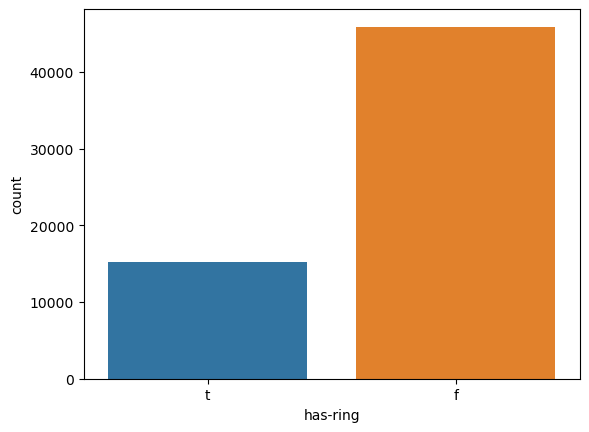

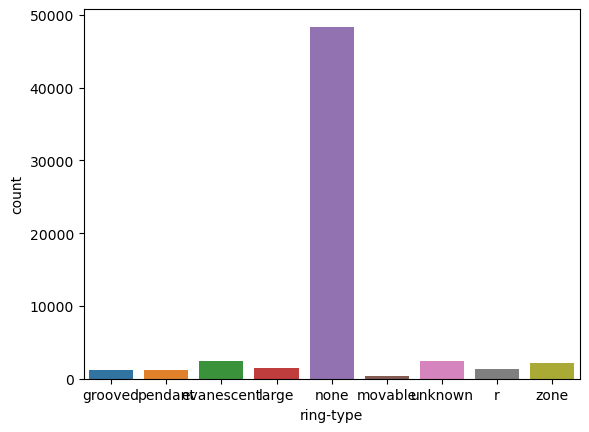

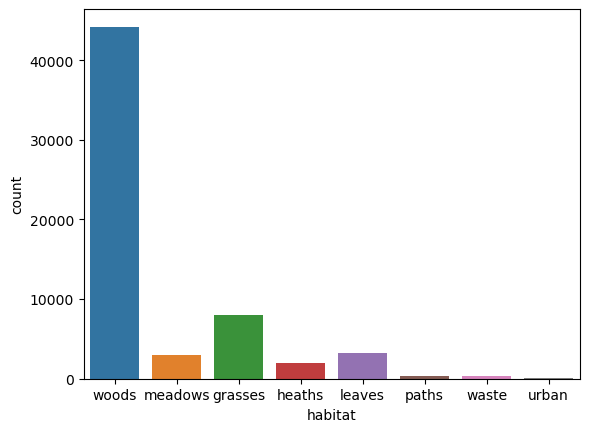

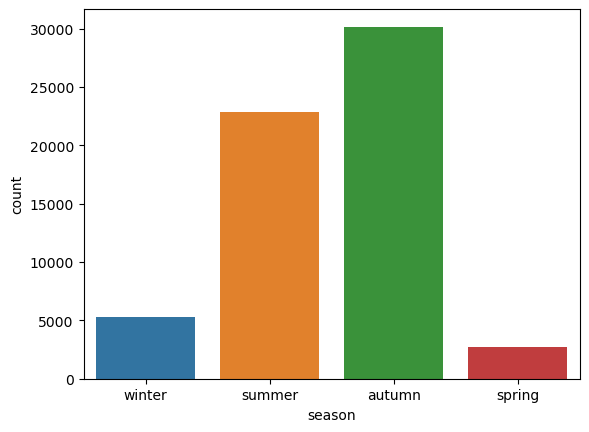

In [11]:
for i in sec_mushroom.columns: 
    sns.countplot(x = i, data = sec_mushroom)
    plt.show()

In [12]:
sec_mushroom.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface                 0
cap-color                   0
does-bruise-or-bleed        0
gill-attachment             0
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                   0
habitat                     0
season                      0
dtype: int64

In [22]:
#to convert the test columns to numerical values
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to non-numerical columns
columns_to_encode = ["class","cap-shape","cap-surface","cap-color", "does-bruise-or-bleed", "gill-attachment", "gill-spacing",
                     "gill-color","stem-color","has-ring", "ring-type", "habitat", "season"]

for column in columns_to_encode:
    sec_mushroom[column] = label_encoder.fit_transform(sec_mushroom[column])

In [14]:
sec_mushroom.isnull().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

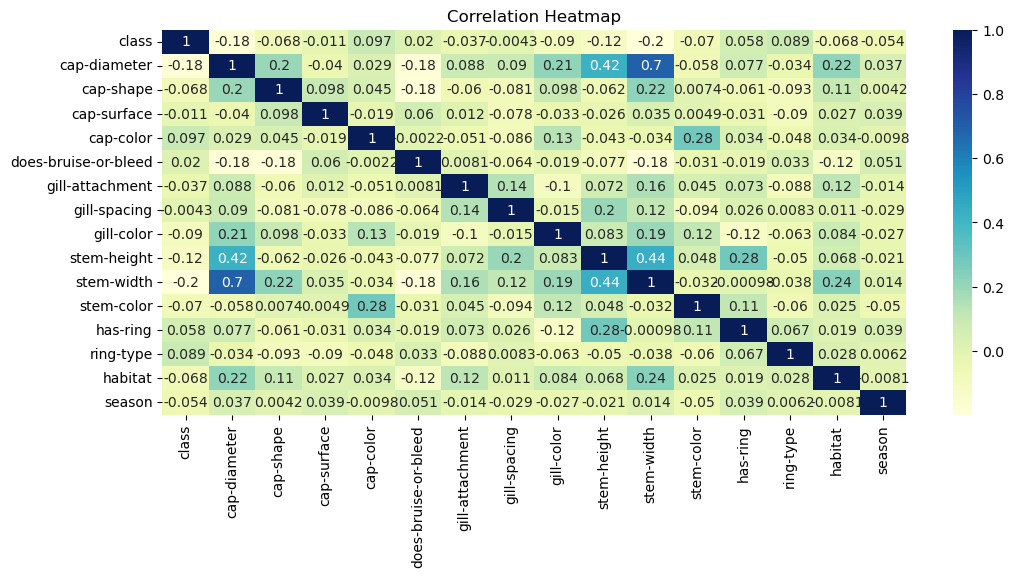

In [21]:
# Create a heat map
correlation_matrix = sec_mushroom.corr()

# Plot the heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

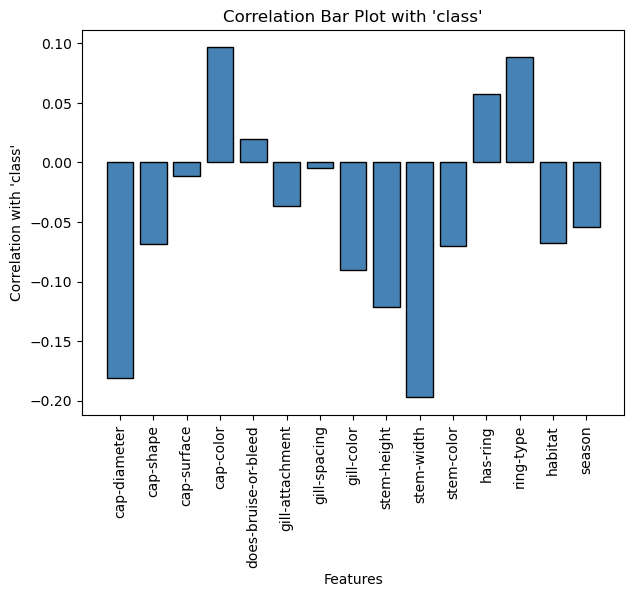

In [24]:
# Get the correlation values between features and the target variable
class_correlation = correlation_matrix['class'].drop('class')

# Determine the number of correlations
num_correlations = len(class_correlation)

# Create an array of x-axis values
x_values = np.arange(num_correlations)

# Create a bar plot
plt.figure(figsize=(7, 5))
plt.bar(x_values, class_correlation, color='steelblue', edgecolor='black')

# Set plot title and axis labels
plt.title("Correlation Bar Plot with 'class'")
plt.xlabel("Features")
plt.ylabel("Correlation with 'class'")

# Set the x-axis tick labels
plt.xticks(x_values, class_correlation.index, rotation=90)

# Display the bar plot
plt.show()


Scatter Plot of the 2 highest corolating attributes

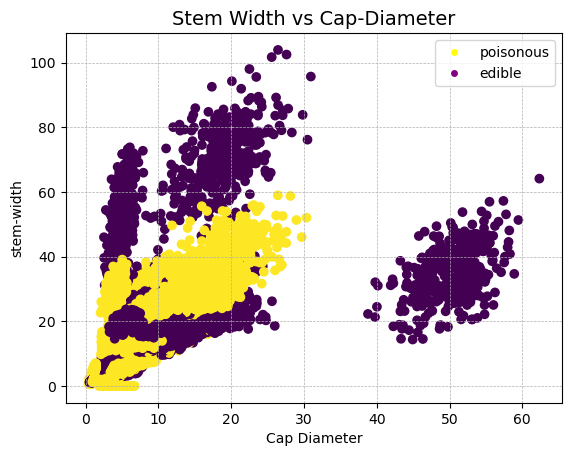

In [17]:
plt.scatter(sec_mushroom['cap-diameter'], sec_mushroom['stem-width'], c=sec_mushroom['class'])
plt.title("Stem Width vs Cap-Diameter", fontsize=14)

# Set the labels for x-axis and y-axis
plt.xlabel('Cap Diameter')
plt.ylabel('stem-width')

# Add gridlines
plt.grid(linestyle = '--', linewidth = 0.5)

# Create a color map for the classes
color_map = {0: 'purple', 1: 'yellow'}

# Get unique class values
classes = sec_mushroom['class'].unique()

# Create custom legend entries for each class
legend_entries = [plt.Line2D([], [], marker='o', color='white', markerfacecolor=color_map[c], label='edible' if c == 0 else 'poisonous') for c in classes]

# Add the legend with custom entries
plt.legend(handles=legend_entries)

# Display the plot
plt.show()


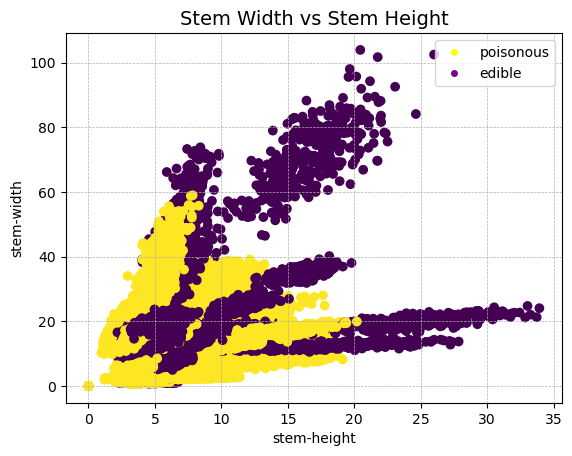

In [18]:
plt.scatter(sec_mushroom['stem-height'], sec_mushroom['stem-width'], c=sec_mushroom['class'])
plt.title("Stem Width vs Stem Height", fontsize=14)

# Set the labels for x-axis and y-axis
plt.xlabel('stem-height')
plt.ylabel('stem-width')

# Add gridlines
plt.grid(linestyle = '--', linewidth = 0.5)

# Create a color map for the classes
color_map = {0: 'purple', 1: 'yellow'}

# Get unique class values
classes = sec_mushroom['class'].unique()

# Create custom legend entries for each class
legend_entries = [plt.Line2D([], [], marker='o', color='white', markerfacecolor=color_map[c], label='edible' if c == 0 else 'poisonous') for c in classes]

# Add the legend with custom entries
plt.legend(handles=legend_entries)

# Display the plot
plt.show()


In [43]:
#checking the distribution of values in the class column
sec_mushroom['class'].value_counts()

class
1    33888
0    27181
Name: count, dtype: int64

In [44]:
# Creating a dataframe to store results
results = pd.DataFrame()
Name = []
Accuracy = []
precision = []
recall = [] 
f1 = []

In [45]:
y = sec_mushroom["class"]
x = sec_mushroom.drop(["class"], axis='columns')

Splitting Data

In [46]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size = 0.3,random_state=42)


Logistic regression no tuning

In [47]:
from sklearn.linear_model import LogisticRegression

linreg = LogisticRegression()
linreg.fit(Xtrain, Ytrain)
lr_train = linreg.predict(Xtrain)
lr_test = linreg.predict(Xtest)

Scaling the input data(Normalisation)

In [49]:
from sklearn.preprocessing import StandardScaler

# Scale the input data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Split the scaled data into training and testing sets
Xtrain_scaled, Xtest_scaled, Ytrain, Ytest = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [50]:
# Create and fit the logistic regression model with scaled data
lr = LogisticRegression()
lr.fit(Xtrain_scaled, Ytrain)
lr_train = lr.predict(Xtrain_scaled)
lr_test = lr.predict(Xtest)

C:\Users\0\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [54]:
print('Accuracy of training set',(accuracy_score(Ytrain, lr_train)*100))
print('Accuracy of test set',(accuracy_score(Ytest, lr_test)*100))
# Calculate precision
linreg_precision = precision_score(Ytest,  lr_test)
print('precision score',linreg_precision*100)

# Calculate recall
linreg_recall = recall_score(Ytest,  lr_test)
print('recall score',linreg_recall*100)

# Calculate F1 score
linreg_f1 = f1_score(Ytest,  lr_test)
print('f1 score',linreg_f1*100)

Accuracy of training set 63.03218864040423
Accuracy of test set 46.68959117952077
precision score 89.96415770609319
recall score 4.915304024282777
f1 score 9.321325782192925


Increasing the number of iterations 

In [56]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size = 0.3,random_state=42)
linreg = LogisticRegression(max_iter=1000)
linreg.fit(Xtrain, Ytrain)
linreg_train = linreg.predict(Xtrain)
linreg_test = linreg.predict(Xtest)

In [57]:
print('Accuracy of training set',(accuracy_score(Ytrain, linreg_train)*100))
print('Accuracy of test set',(accuracy_score(Ytest, linreg_test)*100))

# Calculate precision
linreg_precision = precision_score(Ytest,  linreg_test)
print('precision score',linreg_precision*100)

# Calculate recall
linreg_recall = recall_score(Ytest,  linreg_test)
print('recall score',linreg_recall*100)

# Calculate F1 score
linreg_f1 = f1_score(Ytest,  linreg_test)
print('f1 score',linreg_f1*100)

Accuracy of training set 63.03686722185833
Accuracy of test set 62.82953987227772
precision score 63.76952334709072
recall score 77.15656516204838
f1 score 69.82720425343376


Using a solver

In [58]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size = 0.3,random_state=42)
linreg2 = LogisticRegression(solver='liblinear')
linreg2.fit(Xtrain, Ytrain)
linreg2_train = linreg2.predict(Xtrain)
linreg2_test = linreg2.predict(Xtest)

In [59]:
print('Accuracy of training set',(accuracy_score(Ytrain, linreg2_train)*100))
print('Accuracy of test set',(accuracy_score(Ytest, linreg2_test)*100))

Accuracy of training set 63.04622438476654
Accuracy of test set 62.8240816549315
precision score 63.76881981544439
recall score 77.13698227748948
f1 score 69.81876190898214


In [60]:
# Calculate precision
linreg_precision = precision_score(Ytest,  linreg2_test)
print('precision score',linreg_precision*100)

# Calculate recall
linreg_recall = recall_score(Ytest,  linreg2_test)
print('recall score',linreg_recall*100)

# Calculate F1 score
linreg_f1 = f1_score(Ytest,  linreg2_test)
print('f1 score',linreg_f1*100)

Name.append('Logistic Regression')
Accuracy.append(accuracy_score(Ytest, linreg2_test))
precision.append(precision_score(Ytest, linreg2_test))
recall.append(recall_score(Ytest, linreg2_test))
f1.append(f1_score(Ytest, linreg2_test))

precision score 63.76881981544439
recall score 77.13698227748948
f1 score 69.81876190898214


Confusion Matrix of Logistic Regression

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Create the confusion matrix
cm_linreg = confusion_matrix(Ytest, linreg2_test)
clsrep_linreg = classification_report(Ytest, linreg2_test)

# Print the confusion matrix
print(cm_linreg)
print(clsrep_linreg)


[[3632 4476]
 [2335 7878]]
              precision    recall  f1-score   support

           0       0.61      0.45      0.52      8108
           1       0.64      0.77      0.70     10213

    accuracy                           0.63     18321
   macro avg       0.62      0.61      0.61     18321
weighted avg       0.62      0.63      0.62     18321



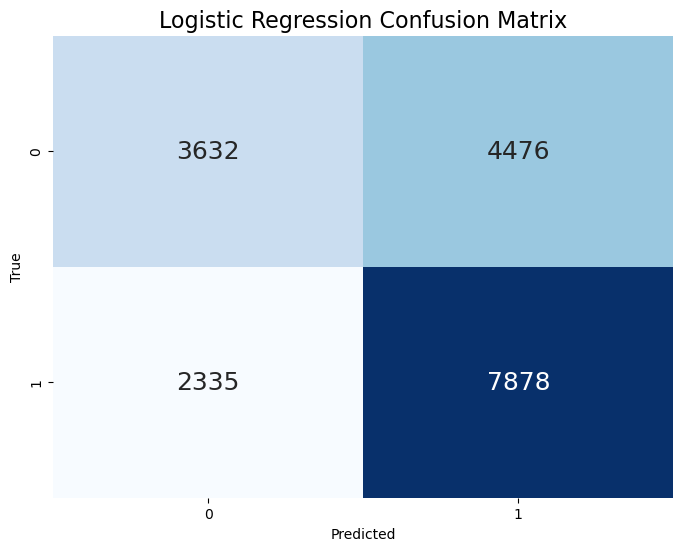

In [65]:
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linreg, annot=True, fmt="d", cmap="Blues", cbar=False,annot_kws={"fontsize": 18})
plt.title("Logistic Regression Confusion Matrix", fontdict={"fontsize": 16})
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

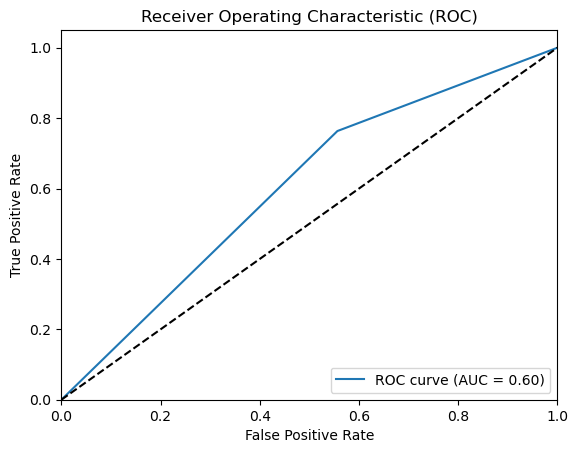

In [187]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(Ytest, linreg2_test)
auc = metrics.roc_auc_score(Ytest, linreg2_test)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Hyperparemeter Tuning

Tuning using K Fold Cross validation

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

kernels = ['rbf', 'linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),sec_mushroom.values, sec_mushroom['class'].values, cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

#avg_scores

In [25]:
avg_scores

{'rbf_1': 0.5632166670548154,
 'rbf_10': 0.568358370810478,
 'rbf_20': 0.568358370810478,
 'linear_1': 1.0,
 'linear_10': 1.0,
 'linear_20': 1.0}

Using GridSearchCV

In [26]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(sec_mushroom.values, sec_mushroom['class'].values)
clf.cv_results_

{'mean_fit_time': array([105.76800447,   0.86858816, 102.50558486,   0.83419805,
        101.69081845,   0.89177928]),
 'std_fit_time': array([7.90755416, 0.10489379, 4.62107714, 0.0768266 , 4.8949665 ,
        0.12463548]),
 'mean_score_time': array([11.52779694,  0.17201166, 11.38812075,  0.17461548, 10.62208514,
         0.1670156 ]),
 'std_score_time': array([0.80251459, 0.00522452, 0.99541034, 0.00858683, 0.28216123,
        0.00940592]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'ker

In [27]:
dframe = pd.DataFrame(clf.cv_results_)
dframe

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,105.768004,7.907554,11.527797,0.802515,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.482643,0.479777,0.584657,0.627149,0.641857,0.563217,0.069549,6
1,0.868588,0.104894,0.172012,0.005225,1,linear,"{'C': 1, 'kernel': 'linear'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
2,102.505585,4.621077,11.388121,0.995410,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.486982,0.481005,0.592844,0.635255,0.645705,0.568358,0.071148,4
3,0.834198,0.076827,0.174615,0.008587,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
4,101.690818,4.894966,10.622085,0.282161,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.486982,0.481005,0.592844,0.635255,0.645705,0.568358,0.071148,4
5,0.891779,0.124635,0.167016,0.009406,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1


In [28]:
dframe[['param_C','param_kernel','mean_test_score']]


,param_C,param_kernel,mean_test_score
0,1,rbf,0.563217
1,1,linear,1.000000
2,10,rbf,0.568358
3,10,linear,1.000000
4,20,rbf,0.568358
5,20,linear,1.000000


In [29]:
clf.best_params_


{'C': 1, 'kernel': 'linear'}

In [30]:
clf.best_score_

1.0

KNN Algorithm

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
# Applying & fine tuning K-Nearest Neighbor

best_score = 0.0
best_k = -1
for k in range(1, 11):
    knn_clf_sk = KNeighborsClassifier(n_neighbors=k)
    knn_clf_sk.fit(Xtrain, Ytrain)
    score = knn_clf_sk.score(Xtest, Ytest)
    if score > best_score:
        best_k = k
        best_score = score

print("best_k = " + str(best_k))
print("best_score = " + str(best_score))

best_k = 1
best_score = 0.998908356530757


In [71]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(Xtrain, Ytrain)
knn_pred_train = knn.predict(Xtrain)
knn_pred_test = knn.predict(Xtest)
print("Accuracy of KNN on Training Set is ",(accuracy_score(Ytrain, knn_pred_train)*100))
print("Accuracy of KNN on Testing Set is ",(accuracy_score(Ytest, knn_pred_test)*100))

Accuracy of KNN on Training Set is  100.0
Accuracy of KNN on Testing Set is  99.8908356530757


In [72]:
# Calculate precision
knn_precision = precision_score(Ytest, knn_pred_test)
print('precision score:',(knn_precision))

# Calculate recall
knn_recall = recall_score(Ytest, knn_pred_test)
print('recall score:',(knn_recall))

# Calculate F1 score
knn_f1 = f1_score(Ytest, knn_pred_test)
print('f1 score',(knn_f1))

Name.append('Knn')
Accuracy.append(accuracy_score(Ytest, knn_pred_test))
precision.append(precision_score(Ytest, knn_pred_test))
recall.append(recall_score(Ytest, knn_pred_test))
f1.append(f1_score(Ytest, knn_pred_test))

precision score: 0.9994120529152376
recall score: 0.9986291980808774
f1 score 0.9990204721324322


Confusion Matrix of KNN

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Create the confusion matrix
cm_knn = confusion_matrix(Ytest, knn_pred_test)
clsrep_knn = classification_report(Ytest, knn_pred_test)

# Print the confusion matrix
print(cm_knn)
print(clsrep_knn)


[[ 8102     6]
 [   14 10199]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8108
           1       1.00      1.00      1.00     10213

    accuracy                           1.00     18321
   macro avg       1.00      1.00      1.00     18321
weighted avg       1.00      1.00      1.00     18321



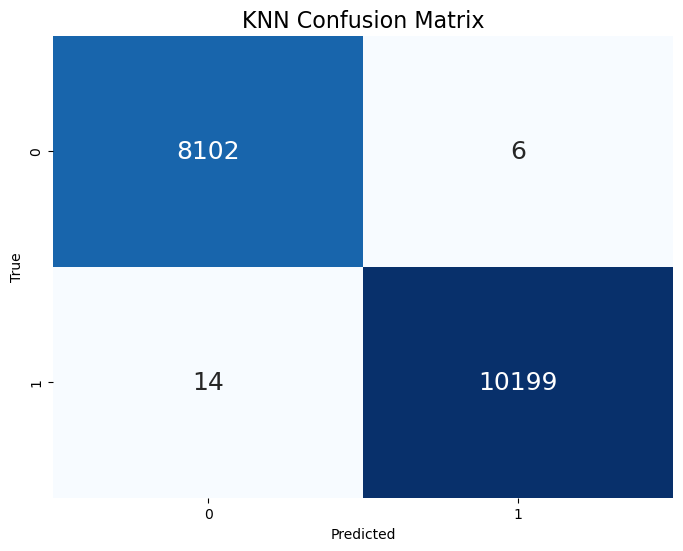

In [74]:
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"fontsize": 18})
plt.title("KNN Confusion Matrix", fontdict={"fontsize": 16})
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

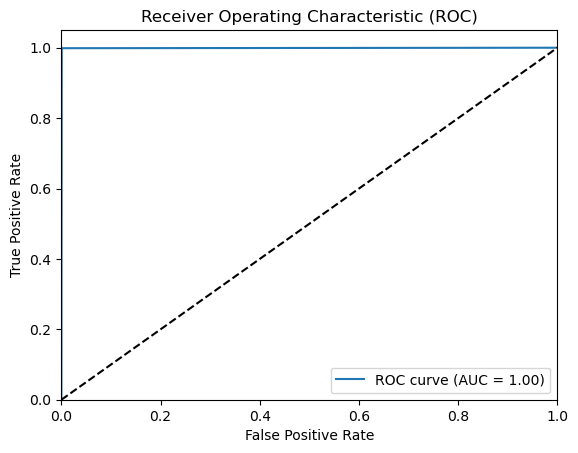

In [40]:
import sklearn.metrics as metrics
#define metrics
fpr, tpr, _ = metrics.roc_curve(Ytest, knn_pred_test)
auc = metrics.roc_auc_score(Ytest, knn_pred_test)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb_pred = gnb.fit(Xtrain, Ytrain).predict(Xtest)
print("Accuracy score using Naive Bayes is: {}%".format(accuracy_score(Ytest, gnb_pred)*100))

Accuracy score using Naive Bayes is: 58.99787129523497%


In [76]:
tree_precision = precision_score(Ytest, gnb_pred)
print('precision score:',(tree_precision))

# Calculate recall
tree_recall = recall_score(Ytest, gnb_pred)
print('recall score:',(tree_recall))

# Calculate F1 score
tree_f1 = f1_score(Ytest, gnb_pred)
print('f1 score',(tree_f1))

Name.append('Naive bayes')
Accuracy.append(accuracy_score(Ytest, gnb_pred))
precision.append(precision_score(Ytest, gnb_pred))
recall.append(recall_score(Ytest, gnb_pred))
f1.append(f1_score(Ytest, gnb_pred))

precision score: 0.5993964819312578
recall score: 0.7974150592382258
f1 score 0.6843697478991597


Confusion Matrix of Naive Bayes

In [77]:
# Create the confusion matrix
cm_nb = confusion_matrix(Ytest, gnb_pred)
clsrep_nb = classification_report(Ytest, gnb_pred)

# Print the confusion matrix
print(cm_nb)
print(clsrep_nb)


[[2665 5443]
 [2069 8144]]
              precision    recall  f1-score   support

           0       0.56      0.33      0.42      8108
           1       0.60      0.80      0.68     10213

    accuracy                           0.59     18321
   macro avg       0.58      0.56      0.55     18321
weighted avg       0.58      0.59      0.57     18321



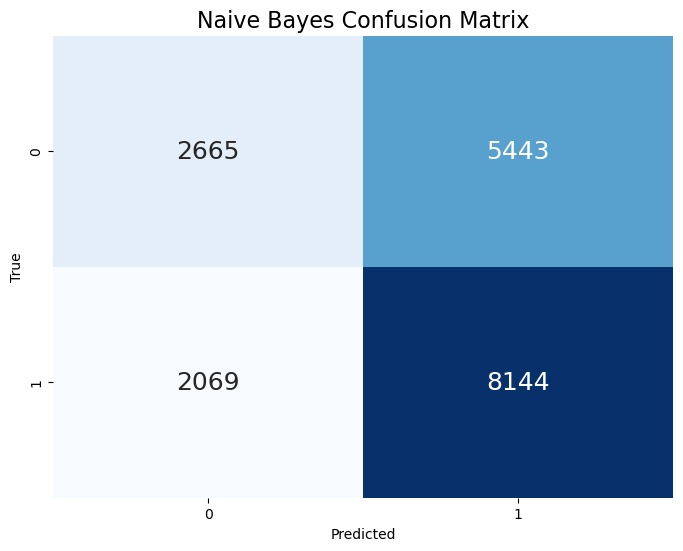

In [78]:
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"fontsize": 18})
plt.title("Naive Bayes Confusion Matrix", fontdict={"fontsize": 16})
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

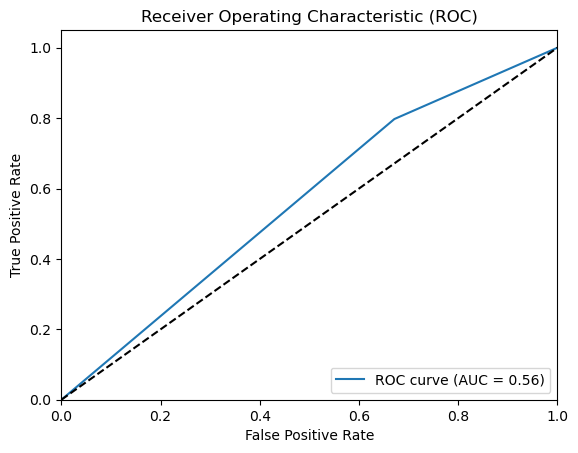

In [45]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(Ytest, gnb_pred)
auc = metrics.roc_auc_score(Ytest, gnb_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Decision tree

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
# Applying & fine tuning Decision Trees
max_depths = [None] + list(range(5, 51, 5))
best_acc = 0
best_max_depth = 0
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(Xtrain, Ytrain)
    dt_pred = dt.predict(Xtest)
    acc_value = accuracy_score(Ytest, dt_pred)
    if acc_value > best_acc:
        best_acc = acc_value
        best_max_depth = max_depth
print("Max accuracy:", best_acc)
print("Best maximum depth:", best_max_depth)

Max accuracy: 0.9963429943780361
Best maximum depth: 25


In [81]:
dst = DecisionTreeClassifier(max_depth=best_max_depth)
dst_pred = dst.fit(Xtrain,Ytrain).predict(Xtest)
print("Accuracy score using Decision Trees is: {}%".format(accuracy_score(Ytest, dst_pred)*100))

Accuracy score using Decision Trees is: 99.56334261230282%


In [82]:
# Calculate precision
tree_precision = precision_score(Ytest, dst_pred)
print('Precision score:', tree_precision)

# Calculate recall
tree_recall = recall_score(Ytest, dst_pred)
print('recall score:',(tree_recall))

# Calculate F1 score
tree_f1 = f1_score(Ytest, dst_pred)
print('f1 score',(tree_f1))

Name.append('Decision Tree')
Accuracy.append(accuracy_score(Ytest, dst_pred))
precision.append(precision_score(Ytest, dst_pred))
recall.append(recall_score(Ytest, dst_pred))
f1.append(f1_score(Ytest, dst_pred))

Precision score: 0.9966669934320165
recall score: 0.9954959365514541
f1 score 0.9960811207994513


Confusion Matrix of Decision Tree

In [83]:
# Create the confusion matrix
cm_dt = confusion_matrix(Ytest, dst_pred)
clsrep_dt = classification_report(Ytest, dst_pred)

# Print the confusion matrix
print(cm_dt)
print(clsrep_dt)


[[ 8074    34]
 [   46 10167]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      8108
           1       1.00      1.00      1.00     10213

    accuracy                           1.00     18321
   macro avg       1.00      1.00      1.00     18321
weighted avg       1.00      1.00      1.00     18321



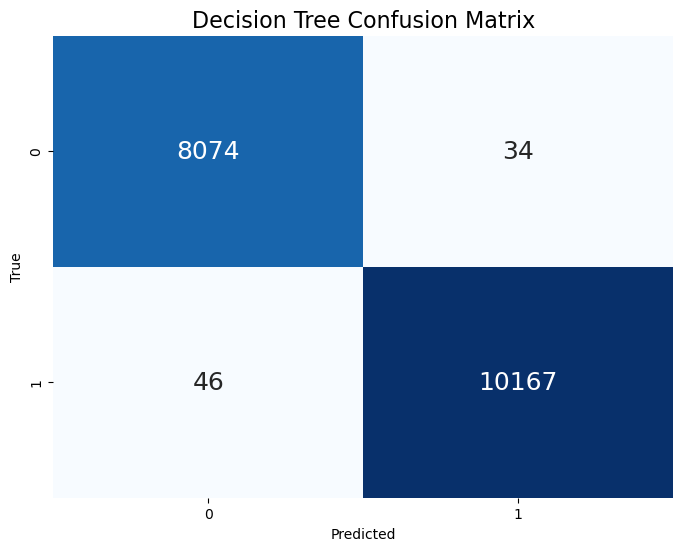

In [84]:
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"fontsize": 18})
plt.title("Decision Tree Confusion Matrix", fontdict={"fontsize": 16})
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

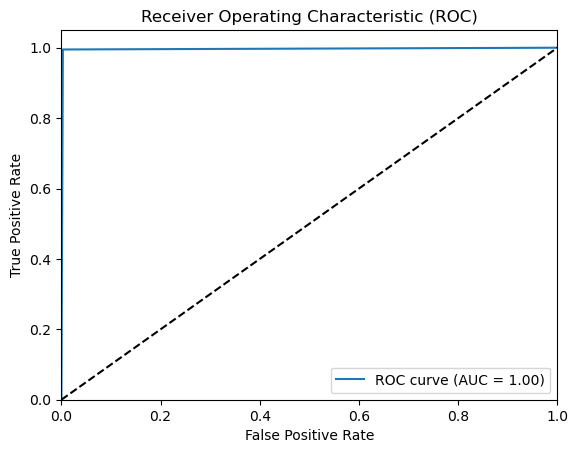

In [52]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(Ytest, dst_pred)
auc = metrics.roc_auc_score(Ytest, dst_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Ada Boost

In [85]:
# Applying AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada_pred = ada.fit(Xtrain, Ytrain).predict(Xtest)
print("Accuracy score using AdaBoost is: {}%".format(accuracy_score(Ytest, ada_pred)*100))
print(classification_report(Ytest, ada_pred))

Accuracy score using AdaBoost is: 76.70978658370177%
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      8108
           1       0.78      0.81      0.79     10213

    accuracy                           0.77     18321
   macro avg       0.76      0.76      0.76     18321
weighted avg       0.77      0.77      0.77     18321



In [86]:
# Calculate precision
ada_precision = precision_score(Ytest, ada_pred)
print('Precision score:', ada_precision)

# Calculate recall
ada_recall = recall_score(Ytest, ada_pred)
print('recall score:',(ada_recall))

# Calculate F1 score
ada_f1 = f1_score(Ytest, ada_pred)
print('f1 score',(ada_f1))

Name.append('AdaBoost')
Accuracy.append(accuracy_score(Ytest, ada_pred))
precision.append(precision_score(Ytest, ada_pred))
recall.append(recall_score(Ytest, ada_pred))
f1.append(f1_score(Ytest, ada_pred))

Precision score: 0.7820147979510529
recall score: 0.8072065015176736
f1 score 0.7944109853047459


In [ ]:
Confusion Matrix of Ada boost

In [87]:
# Create the confusion matrix
cm_ada = confusion_matrix(Ytest, ada_pred)
clsrep_ada = classification_report(Ytest, ada_pred)

# Print the confusion matrix
print(cm_ada)
print(clsrep_ada)


[[5810 2298]
 [1969 8244]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      8108
           1       0.78      0.81      0.79     10213

    accuracy                           0.77     18321
   macro avg       0.76      0.76      0.76     18321
weighted avg       0.77      0.77      0.77     18321



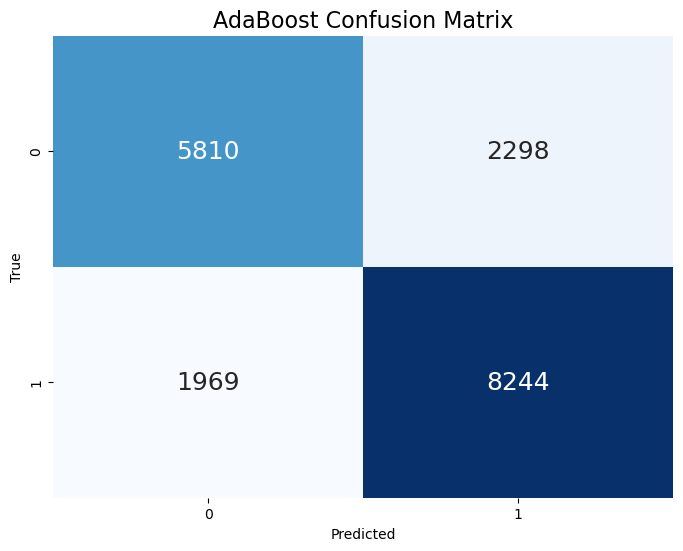

In [88]:
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ada, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"fontsize": 18})
plt.title("AdaBoost Confusion Matrix", fontdict={"fontsize": 16})
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

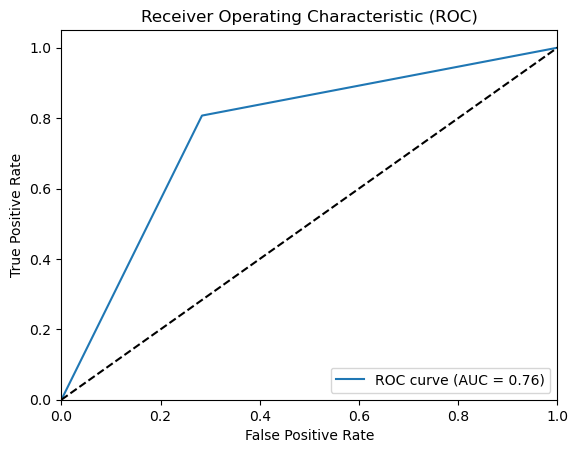

In [57]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(Ytest, ada_pred)
auc = metrics.roc_auc_score(Ytest, ada_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [58]:
# Showing the results 

results['n'] = Name
results['Accuracy'] = Accuracy
results['precision'] = precision
results['recall'] = recall
results['f1'] = f1
results

,n,Accuracy,precision,recall,f1
0,Linear Regression,0.628186,0.637637,0.771370,0.698157
1,Naive bayes,0.589979,0.599396,0.797415,0.684370
2,Decision Tree,0.995906,0.997644,0.995006,0.996323
3,AdaBoost,0.767098,0.782015,0.807207,0.794411


Handling Class Imbalance

In [90]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

Random Oversampling

In [94]:
# Random Oversampling
ros = RandomOverSampler(random_state=42)
X_train_oversampled, Y_train_oversampled = ros.fit_resample(Xtrain, Ytrain)

# Create the Logistic Regression classifier and fit the oversampled data
logreg_oversampled = LogisticRegression(random_state=42)
logreg_oversampled.fit(X_train_oversampled, Y_train_oversampled)
logreg_oversampled_pred = logreg_oversampled.predict(Xtest)

# Calculate and print the accuracy score and classification report for oversampling
accuracy_oversampled = accuracy_score(Ytest, logreg_oversampled_pred)
report_oversampled = classification_report(Ytest, logreg_oversampled_pred)

print("Accuracy score using Logistic Regression with Random Oversampling is: {}%".format(accuracy_oversampled * 100))
print(report_oversampled)

Accuracy score using Logistic Regression with Random Oversampling is: 63.00420282735658%
              precision    recall  f1-score   support

           0       0.58      0.60      0.59      8108
           1       0.67      0.65      0.66     10213

    accuracy                           0.63     18321
   macro avg       0.63      0.63      0.63     18321
weighted avg       0.63      0.63      0.63     18321



In [95]:
# Calculate precision
logreg_oversam_prec = precision_score(Ytest, logreg_oversampled_pred)
print('Precision score:', logreg_oversam_prec)

# Calculate recall
logreg_oversam_recall = recall_score(Ytest, logreg_oversampled_pred)
print('recall score:',(logreg_oversam_recall))

# Calculate F1 score
logreg_oversam_f1 = f1_score(Ytest, logreg_oversampled_pred)
print('f1 score',(logreg_oversam_f1))

Name.append('LogReg Oversampled')
Accuracy.append(accuracy_score(Ytest, logreg_oversampled_pred))
precision.append(precision_score(Ytest, logreg_oversampled_pred))
recall.append(recall_score(Ytest, logreg_oversampled_pred))
f1.append(f1_score(Ytest, logreg_oversampled_pred))

Precision score: 0.6743123921648229
recall score: 0.6505434250465093
f1 score 0.6622146915179905


In [96]:
# Create the confusion matrix
cm_logreg_oversam = confusion_matrix(Ytest, logreg_oversampled_pred)

# Print the confusion matrix
print(cm_logreg_oversam)

[[4899 3209]
 [3569 6644]]


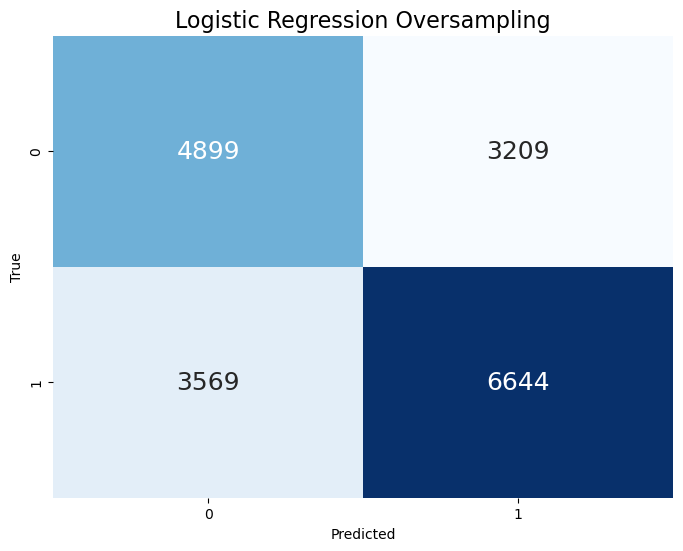

In [97]:
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg_oversam, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"fontsize": 18})
plt.title("Logistic Regression Oversampling", fontdict={"fontsize": 16})
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Random Undersampling

In [100]:
# Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, Y_train_undersampled = rus.fit_resample(Xtrain, Ytrain)

# Create the Logistic Regression classifier and fit the undersampled data
logreg_undersampled = LogisticRegression(random_state=42)
logreg_undersampled.fit(X_train_undersampled, Y_train_undersampled)
logreg_undersampled_pred = logreg_undersampled.predict(Xtest)

# Calculate and print the accuracy score and classification report for undersampling
accuracy_undersampled = accuracy_score(Ytest, logreg_undersampled_pred)
report_undersampled = classification_report(Ytest, logreg_undersampled_pred)

print("Accuracy score using Logistic Regression with Random Undersampling is: {}%".format(accuracy_undersampled * 100))


Accuracy score using Logistic Regression with Random Undersampling is: 62.92778778450958%


In [101]:
# Calculate precision
logreg_undrsam_prec = precision_score(Ytest, logreg_undersampled_pred)
print('Precision score:', logreg_undrsam_prec)

# Calculate recall
logreg_undrsam_recall = recall_score(Ytest, logreg_undersampled_pred)
print('recall score:',(logreg_undrsam_recall))

# Calculate F1 score
logreg_undrsam_f1 = f1_score(Ytest, logreg_undersampled_pred)
print('f1 score',(logreg_undrsam_f1))

Name.append('LogReg Undersampled')
Accuracy.append(accuracy_score(Ytest, logreg_undersampled_pred))
precision.append(precision_score(Ytest, logreg_undersampled_pred))
recall.append(recall_score(Ytest, logreg_undersampled_pred))
f1.append(f1_score(Ytest, logreg_undersampled_pred))

Precision score: 0.6741676000407291
recall score: 0.6482913933222364
f1 score 0.6609763402216233


In [102]:
# Create the confusion matrix
cm_logreg_undersam = confusion_matrix(Ytest, logreg_undersampled_pred)

# Print the confusion matrix
print(cm_logreg_undersam)

[[4908 3200]
 [3592 6621]]


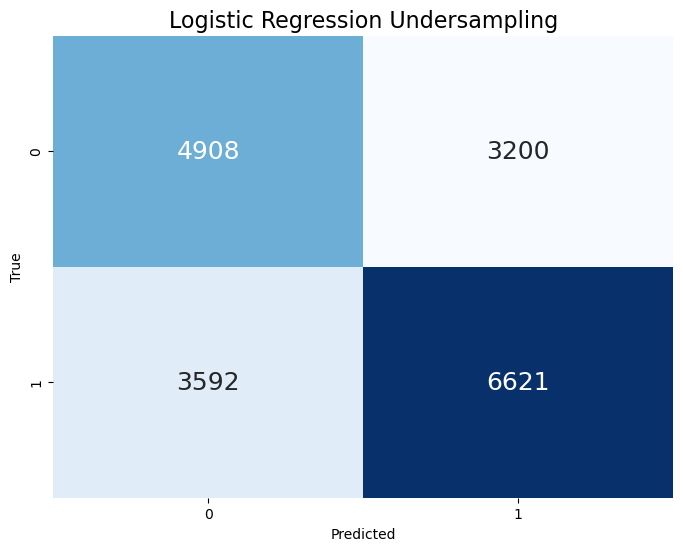

In [103]:
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg_undersam, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"fontsize": 18})
plt.title("Logistic Regression Undersampling", fontdict={"fontsize": 16})
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
SMOTE

In [107]:
# SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTEENN(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(Xtrain, Ytrain)

# Create the Logistic Regression classifier and fit the SMOTE data
logreg_smote = LogisticRegression(random_state=42,max_iter=1000)
logreg_smote.fit(X_train_smote, Y_train_smote)
logreg_smote_pred = logreg_smote.predict(Xtest)

# Calculate and print the accuracy score and classification report for SMOTE
accuracy_smote = accuracy_score(Ytest, logreg_smote_pred)
report_smote = classification_report(Ytest, logreg_smote_pred)

print("Accuracy score using Logistic Regression with SMOTE is: {}%".format(accuracy_smote * 100))



Accuracy score using Logistic Regression with SMOTE is: 63.05332678347252%


In [108]:
# Calculate precision
logreg_smote_prec = precision_score(Ytest, logreg_smote_pred)
print('Precision score:', logreg_smote_prec)

# Calculate recall
logreg_smote_recall = recall_score(Ytest, logreg_smote_pred)
print('recall score:',(logreg_smote_recall))

# Calculate F1 score
logreg_smote_f1 = f1_score(Ytest, logreg_smote_pred)
print('f1 score',(logreg_smote_f1))

Name.append('LogReg Smote')
Accuracy.append(accuracy_score(Ytest, logreg_smote_pred))
precision.append(precision_score(Ytest, logreg_smote_pred))
recall.append(recall_score(Ytest, logreg_smote_pred))
f1.append(f1_score(Ytest, logreg_smote_pred))

Precision score: 0.6755709624796085
recall score: 0.6487809654362088
f1 score 0.6619049997502623


In [109]:
# Create the confusion matrix
cm_logreg_smote = confusion_matrix(Ytest, logreg_smote_pred)

# Print the confusion matrix
print(cm_logreg_smote)

[[4926 3182]
 [3587 6626]]


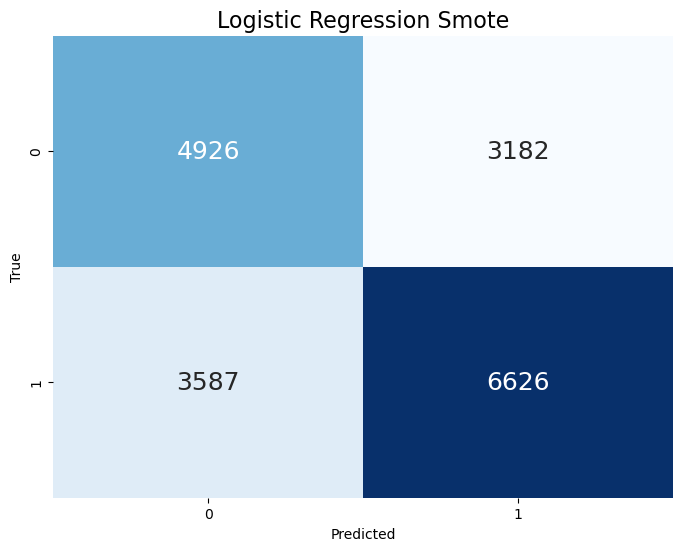

In [111]:
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg_smote, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"fontsize": 18})
plt.title("Logistic Regression Smote", fontdict={"fontsize": 16})
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

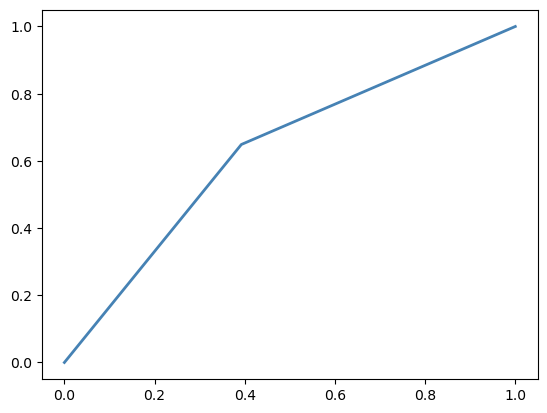

In [68]:
# Calculate the false positive rate, true positive rate, and thresholds for SMOTE
fpr_smote, tpr_smote, thresholds_smote = roc_curve(Ytest, logreg_smote_pred)

# Calculate the AUC score for SMOTE
auc_score_smote = auc(fpr_smote, tpr_smote)

# Plot the ROC curve for SMOTE
plt.plot(fpr_smote, tpr_smote, color='steelblue', linewidth=2)
plt.plot

In [132]:
# Showing the results 

results['n'] = Name
results['Accuracy'] = Accuracy
results['precision'] = precision
results['recall'] = recall
results['f1'] = f1
results

,n,Accuracy,precision,recall,f1
0,Logistic Regression,0.628241,0.637688,0.771370,0.698188
1,Knn,0.998908,0.999412,0.998629,0.999020
2,Naive bayes,0.589979,0.599396,0.797415,0.684370
3,Decision Tree,0.995633,0.996667,0.995496,0.996081
4,AdaBoost,0.767098,0.782015,0.807207,0.794411
5,LogReg Oversampled,0.630042,0.674312,0.650543,0.662215
6,LogReg Oversampled,0.630042,0.674312,0.650543,0.662215
7,LogReg Undersampled,0.629278,0.674168,0.648291,0.660976
8,LogReg Smote,0.630533,0.675571,0.648781,0.661905


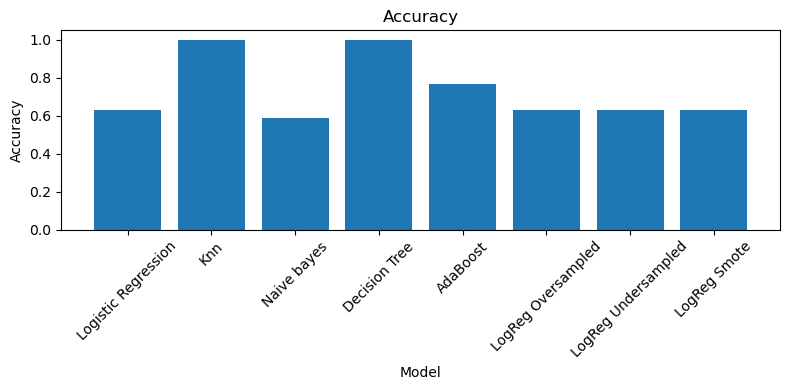

In [134]:
# Extract the values from the DataFrame
n_values = results['n']
accuracy_values = results['Accuracy']
precision_values = results['precision']
recall_values = results['recall']
f1_values = results['f1']

# Plot the Accuracy chart
plt.figure(figsize=(8, 4))
plt.bar(n_values, accuracy_values)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

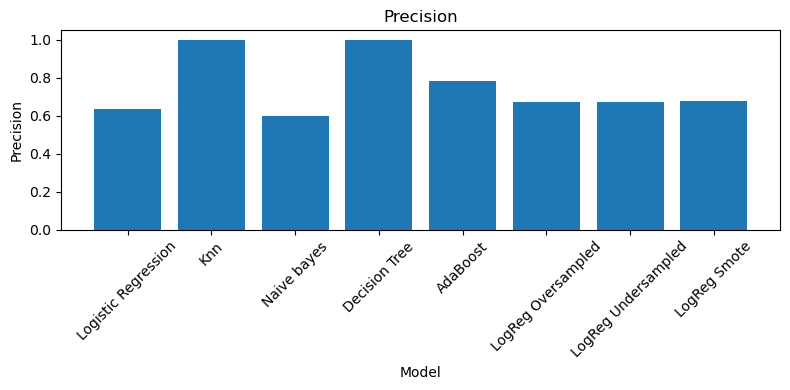

In [135]:
# Plot the Precision chart
plt.figure(figsize=(8, 4))
plt.bar(n_values, precision_values)
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


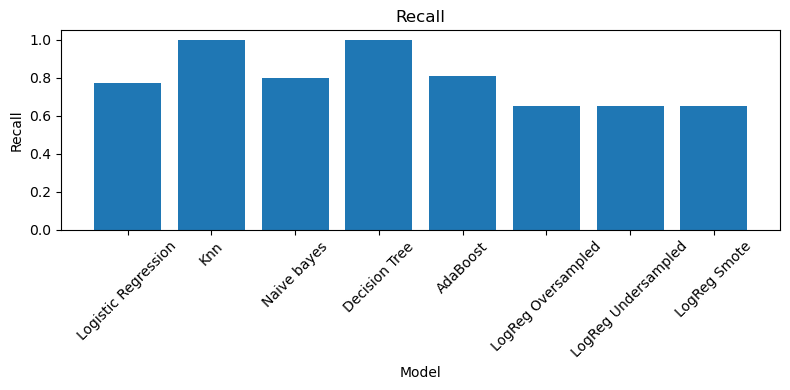

In [136]:
# Plot the Recall chart
plt.figure(figsize=(8, 4))
plt.bar(n_values, recall_values)
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


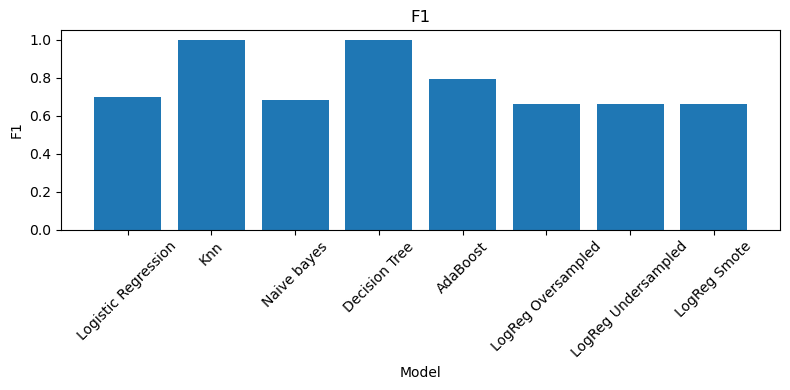

In [137]:
# Plot the F1 chart
plt.figure(figsize=(8, 4))
plt.bar(n_values, f1_values)
plt.xlabel('Model')
plt.ylabel('F1')
plt.title('F1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [125]:
naive_bayes = GaussianNB()

# Random Over-sampling
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(Xtrain, Ytrain)
naive_bayes_ros = GaussianNB()
naive_bayes_ros.fit(X_train_ros, y_train_ros)
y_pred_ros = naive_bayes_ros.predict(Xtest)

accuracy_nb = accuracy_score(Ytest, y_pred_ros)
report_nb = classification_report(Ytest, y_pred_ros)

print("Accuracy score is: {}%".format(accuracy_nb * 100))

# Calculate precision
nb_ros_prec = precision_score(Ytest, y_pred_ros)
print('Precision score:', nb_ros_prec*100)

# Calculate recall
nb_ros_rec = recall_score(Ytest, y_pred_ros)
print('recall score:',(nb_ros_rec*100))

# Calculate F1 score
nb_ros_f1 = f1_score(Ytest, y_pred_ros)
print('f1 score',(nb_ros_f1*100))


Accuracy score is: 59.210741771737354%
Precision score: 60.855784469096676
recall score: 75.19827670615882
f1 score 67.27105505189857


In [126]:
# Random Under-sampling
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(Xtrain, Ytrain)
naive_bayes_rus = GaussianNB()
naive_bayes_rus.fit(X_train_rus, y_train_rus)
y_pred_rus = naive_bayes_rus.predict(Xtest)

accuracy_nb = accuracy_score(Ytest, y_pred_rus)
report_nb = classification_report(Ytest, y_pred_rus)

print("Accuracy score is: {}%".format(accuracy_nb * 100))

# Calculate precision
nb_rus_prec = precision_score(Ytest, y_pred_rus)
print('Precision score:', nb_rus_prec*100)

# Calculate recall
nb_rus_rec = recall_score(Ytest, y_pred_rus)
print('recall score:',(nb_rus_rec*100))

# Calculate F1 score
nb_rus_f1 = f1_score(Ytest, y_pred_rus)
print('f1 score',(nb_rus_f1*100))


Accuracy score is: 59.085202772774416%
Precision score: 60.87234893957583
recall score: 74.47370997747969
f1 score 66.98960718689449


In [127]:
# SMOTE (Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(Xtrain, Ytrain)
naive_bayes_smote = GaussianNB()
naive_bayes_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = naive_bayes_smote.predict(Xtest)

accuracy_nb = accuracy_score(Ytest, y_pred_smote)
report_nb = classification_report(Ytest, y_pred_smote)

print("Accuracy score is: {}%".format(accuracy_nb * 100))
# Calculate precision
nb_smote_prec = precision_score(Ytest, y_pred_smote)
print('Precision score:', nb_smote_prec*100)

# Calculate recall
nb_smote_rec = recall_score(Ytest, y_pred_smote)
print('recall score:',(nb_smote_rec*100))

# Calculate F1 score
nb_smote_f1 = f1_score(Ytest, y_pred_smote)
print('f1 score',(nb_smote_f1*100))

Accuracy score is: 59.036078816658474%
Precision score: 60.70186531773633
recall score: 75.19827670615882
f1 score 67.17690793789636
